# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.1.4
seaborn version :  0.12.2


In [2]:
# Load dataset
df = pd.read_excel('youtube_statistics.xlsx')
df= pd.DataFrame(df)
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
21808,2018-03-18,Indians In A Baraat | The Timeliners,The Timeliners,24,08:57:47,"hindi song|""funny videos""|""music""|""indian""|""co...",1036551,41542,3270,2934,False,False,False,A big fat Indian wedding is not complete witho...,34,1565,36,2018-03-16
15877,2018-02-10,Priyamanasam Epi 146 08-02-18 (Download & Watc...,Asianet,24,05:00:28,"asianet|""malayalam channel""|""tv show""|""malayal...",36433,81,17,6,False,False,False,Priyamanasam Epi 146 08-02-18 (Download & Watc...,19,466,72,2018-02-09
29338,2018-05-04,Bhavesh Joshi Superhero Official Trailer | Har...,Eros Now,24,08:30:02,"bhavesh joshi|""bhavesh joshi superhero""|""bhave...",241067,5875,492,449,False,False,False,Presenting the official trailer of #BhaveshJos...,17,1012,94,2018-05-02
34966,2018-06-04,BwC S5E5 - Yuzvendra Chahal,Breakfast With Champions,24,12:53:49,"breakfast with champions|""gaurav kapur""|""crick...",1508761,18345,507,1630,False,False,False,A national-level Chess player and Team India c...,33,1046,27,2018-05-31
28501,2018-04-29,Dhee 10 | 25th April 2018 | Full Episode | ETV...,ETV Dhee,24,18:16:29,"etv shows|""eenadu television""|""padutha theeyag...",3562384,15427,2734,2224,False,False,False,దక్షణ భారతదేశంలోనే అతిపెద్ద డాన్స్ రియాలిటీ షో...,31,548,53,2018-04-25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
# Check unique values of each column
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              12375
tags                      12463
views                     31638
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13979
No_tags                      66
desc_len                   2850
len_title                    91
publish_date                219
dtype: int64


In [5]:
# Check duplicates
df.duplicated().sum()


4229

In [6]:
# Check missing values
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

### Insight: 
- Dataset memiliki 36791 kolom
- Terdapat nilai null hanya pada kolom deskripsi
- Terdapat 4229 kolom duplikat
- Terdapat 10 kolom kategorikal dan 8 kolom numerikal


In [7]:
# Set numerical and categorical features
cats = ['category_id', 'trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['likes','dislikes','comment_count','No_tags','desc_len','len_title', 'views']


In [8]:
# Statistic descriptive on numerical features
df[nums].describe()

,likes,dislikes,comment_count,No_tags,desc_len,len_title,views
count,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,3.679100e+04
mean,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,1.071490e+06
std,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,3.207149e+06
min,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,4.024000e+03
25%,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,1.256040e+05
50%,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,3.078360e+05
75%,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,8.066315e+05
max,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,1.254322e+08


In [9]:
# Changing data type to object
for col in cats:
    df[col] = df[col].astype('object')
    
# Statistical description of categorical features
df[cats].describe()


,category_id,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,17,205,16431,1390,12375,12463,2,2,2,13979,219
top,24,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,16462,199,19,284,333,1120,35611,36034,36780,166,318


### Insight:

- Distribusi data pada Fitur views, likes, dislikes, comment_count, desc_len, and len_title terlihat skewed. 
- Pada Fitur comment_disabled, rating_disabled, dan video_error_or_removed, terdapat dominasi nilai False yang sangat besar.




## Univariate Analysis

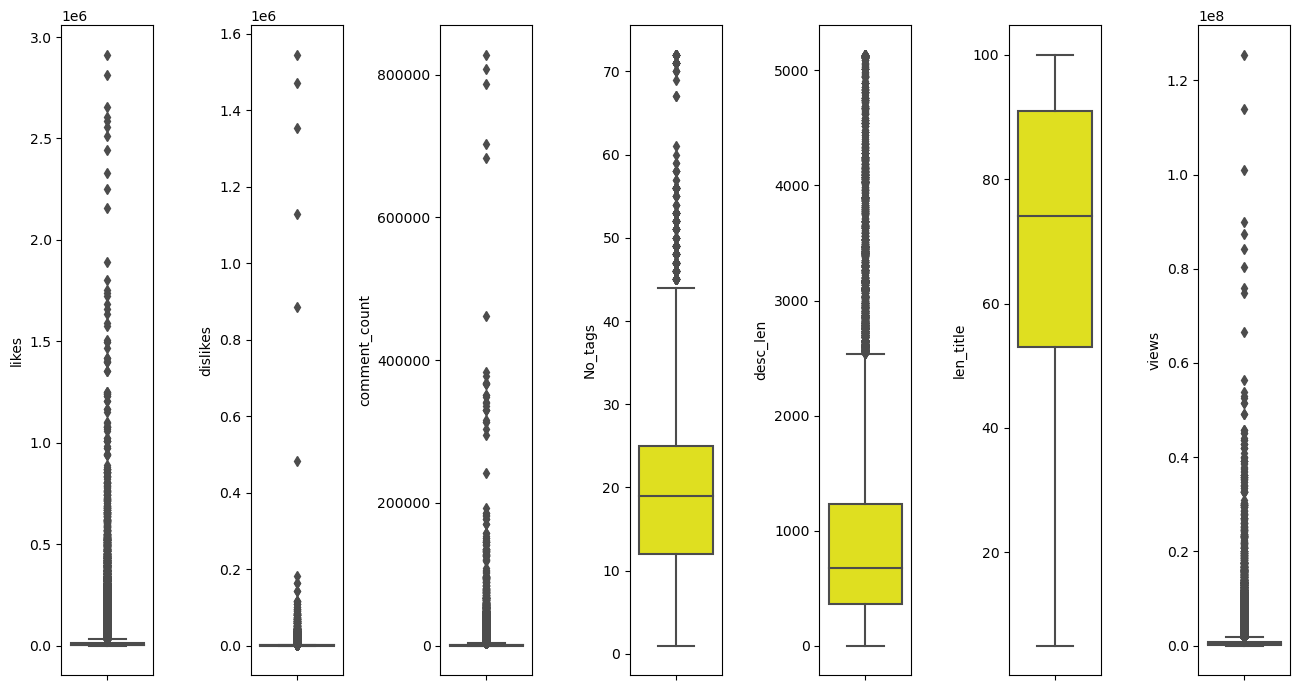

In [10]:
# Viewing data outliers using boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()
#plt.savefig('fig/boxplot.png')


### Insight:
- Fitur views, likes, dislikes, dan comment_count memiliki banyak outliers dengan jarak yang sangat ekstrim.
- Fitur no_tags, dan desc_len juga memiliki outliers namun jaraknya tidak se ekstrim ke empat kolom yang telah disebutkan sebelumnya.
- Fitur len_title tidak memiliki outliers, mungkin ini disebabkan oleh adanya default batas 'jumlah kata' penulisan judul video.



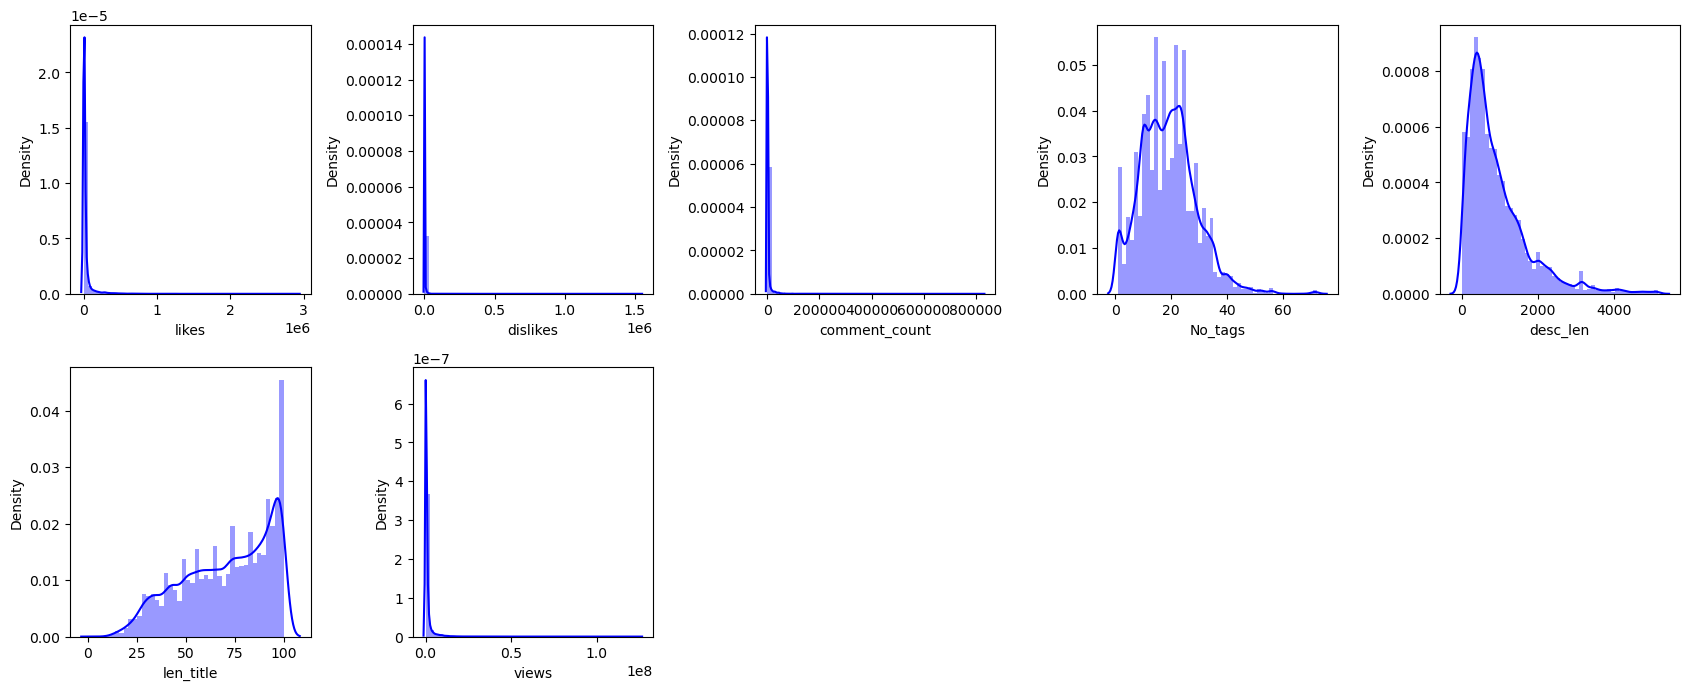

In [11]:
# Viewing distributions using distplot:
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()
plt.show()


### Insight: 
- Fitur len_title memiliki distribusi skew negatif sedangkan fitur lainya memiliki distribusi skew positif.
- Fitur views, likes, dislikes, dan comment_count berkonsentrasi di sekitar 0 dengan ekor kanan yang panjang, artinya distribusi mencakup nilai ekstrem yang secara signifikan lebih tinggi daripada sisa data.

## Bivariate Analysis 

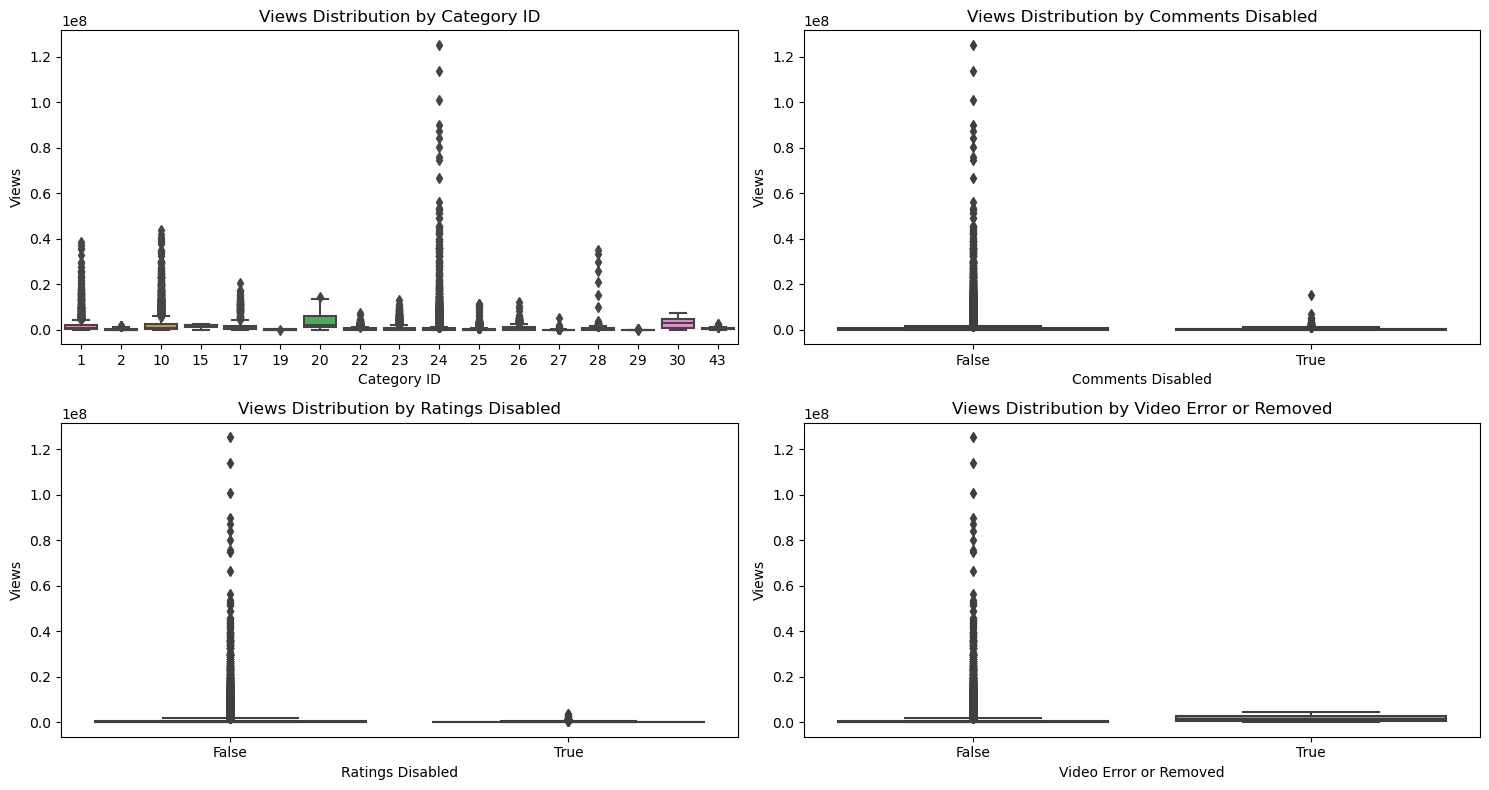

In [12]:
##----BOXPLOT
# Create a figure and axes with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Box plot for category_id
sns.boxplot(x='category_id', y='views', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Views Distribution by Category ID')
axes[0, 0].set_xlabel('Category ID')
axes[0, 0].set_ylabel('Views')

# Box plot for comments_disabled
sns.boxplot(x='comments_disabled', y='views', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Views Distribution by Comments Disabled')
axes[0, 1].set_xlabel('Comments Disabled')
axes[0, 1].set_ylabel('Views')

# Box plot for ratings_disabled
sns.boxplot(x='ratings_disabled', y='views', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Views Distribution by Ratings Disabled')
axes[1, 0].set_xlabel('Ratings Disabled')
axes[1, 0].set_ylabel('Views')

# Box plot for video_error_or_removed
sns.boxplot(x='video_error_or_removed', y='views', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Views Distribution by Video Error or Removed')
axes[1, 1].set_xlabel('Video Error or Removed')
axes[1, 1].set_ylabel('Views')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Insights:
- Di 'category_id', id 24 memiliki jumlah views tertinggi dan id 10, id 1 dan id 28 memiliki total views yang relatif lebih tinggi dari yang lainya.
- Pada fitur 'comments_disabled', 'ratings_disabled', dan 'video_error_or_removed', nilai False memiliki jumlah views yang lebih besar dibanding nilai True (general domain: video akan mendapat views lebih banyak jika kedua variabel tersebut False). Ini mengindikasikan bahwa ketiga fitur tersebut bukan oredictor jumlah views yang baik.

## Multivariate Analysis

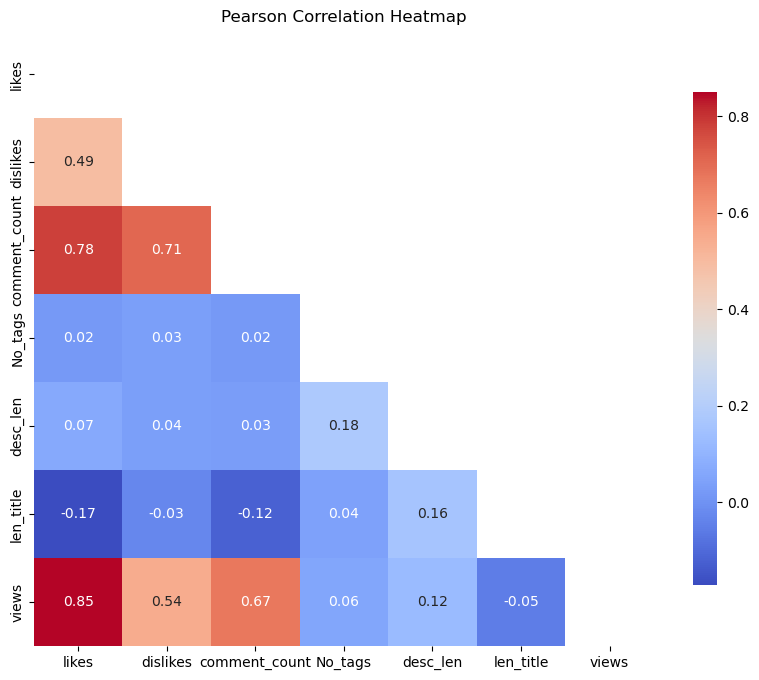

In [13]:
# Create a mask to cover the upper part of the correlation matrix
mask = np.triu(np.ones_like(df[nums].corr(), dtype=bool))

# Function to create a heatmap
def plot_heatmap(corr, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Calculate and plot heatmap for each correlation method
plot_heatmap(df[nums].corr(), 'Pearson Correlation Heatmap')


### Insight:
- korelasi koefisien  'views'-'likes' sebesar 0,85 yang artinya terdapat hubungan linear yang sangat kuat antara keduanya. Koefisien Korelasi 'views'-'dislikes' sebesar 0,54 dan 'views'-'comment_count' sebesar 0,67 yang menunjukan bahwa dislike dan comment_count juga mempunyai hubungan linear yang signifikan dengan target. Kesimpulanya, fitur likes, dislikes dan comment_count kemungkinan besar menjadi prediktor yang baik untuk target 'views'
- Terdapat korelasi linier yang juga sangat tinggi satu sama lain pada fitur 'likes', 'dislikes', dan 'comment_view'.



<Figure size 1000x800 with 0 Axes>

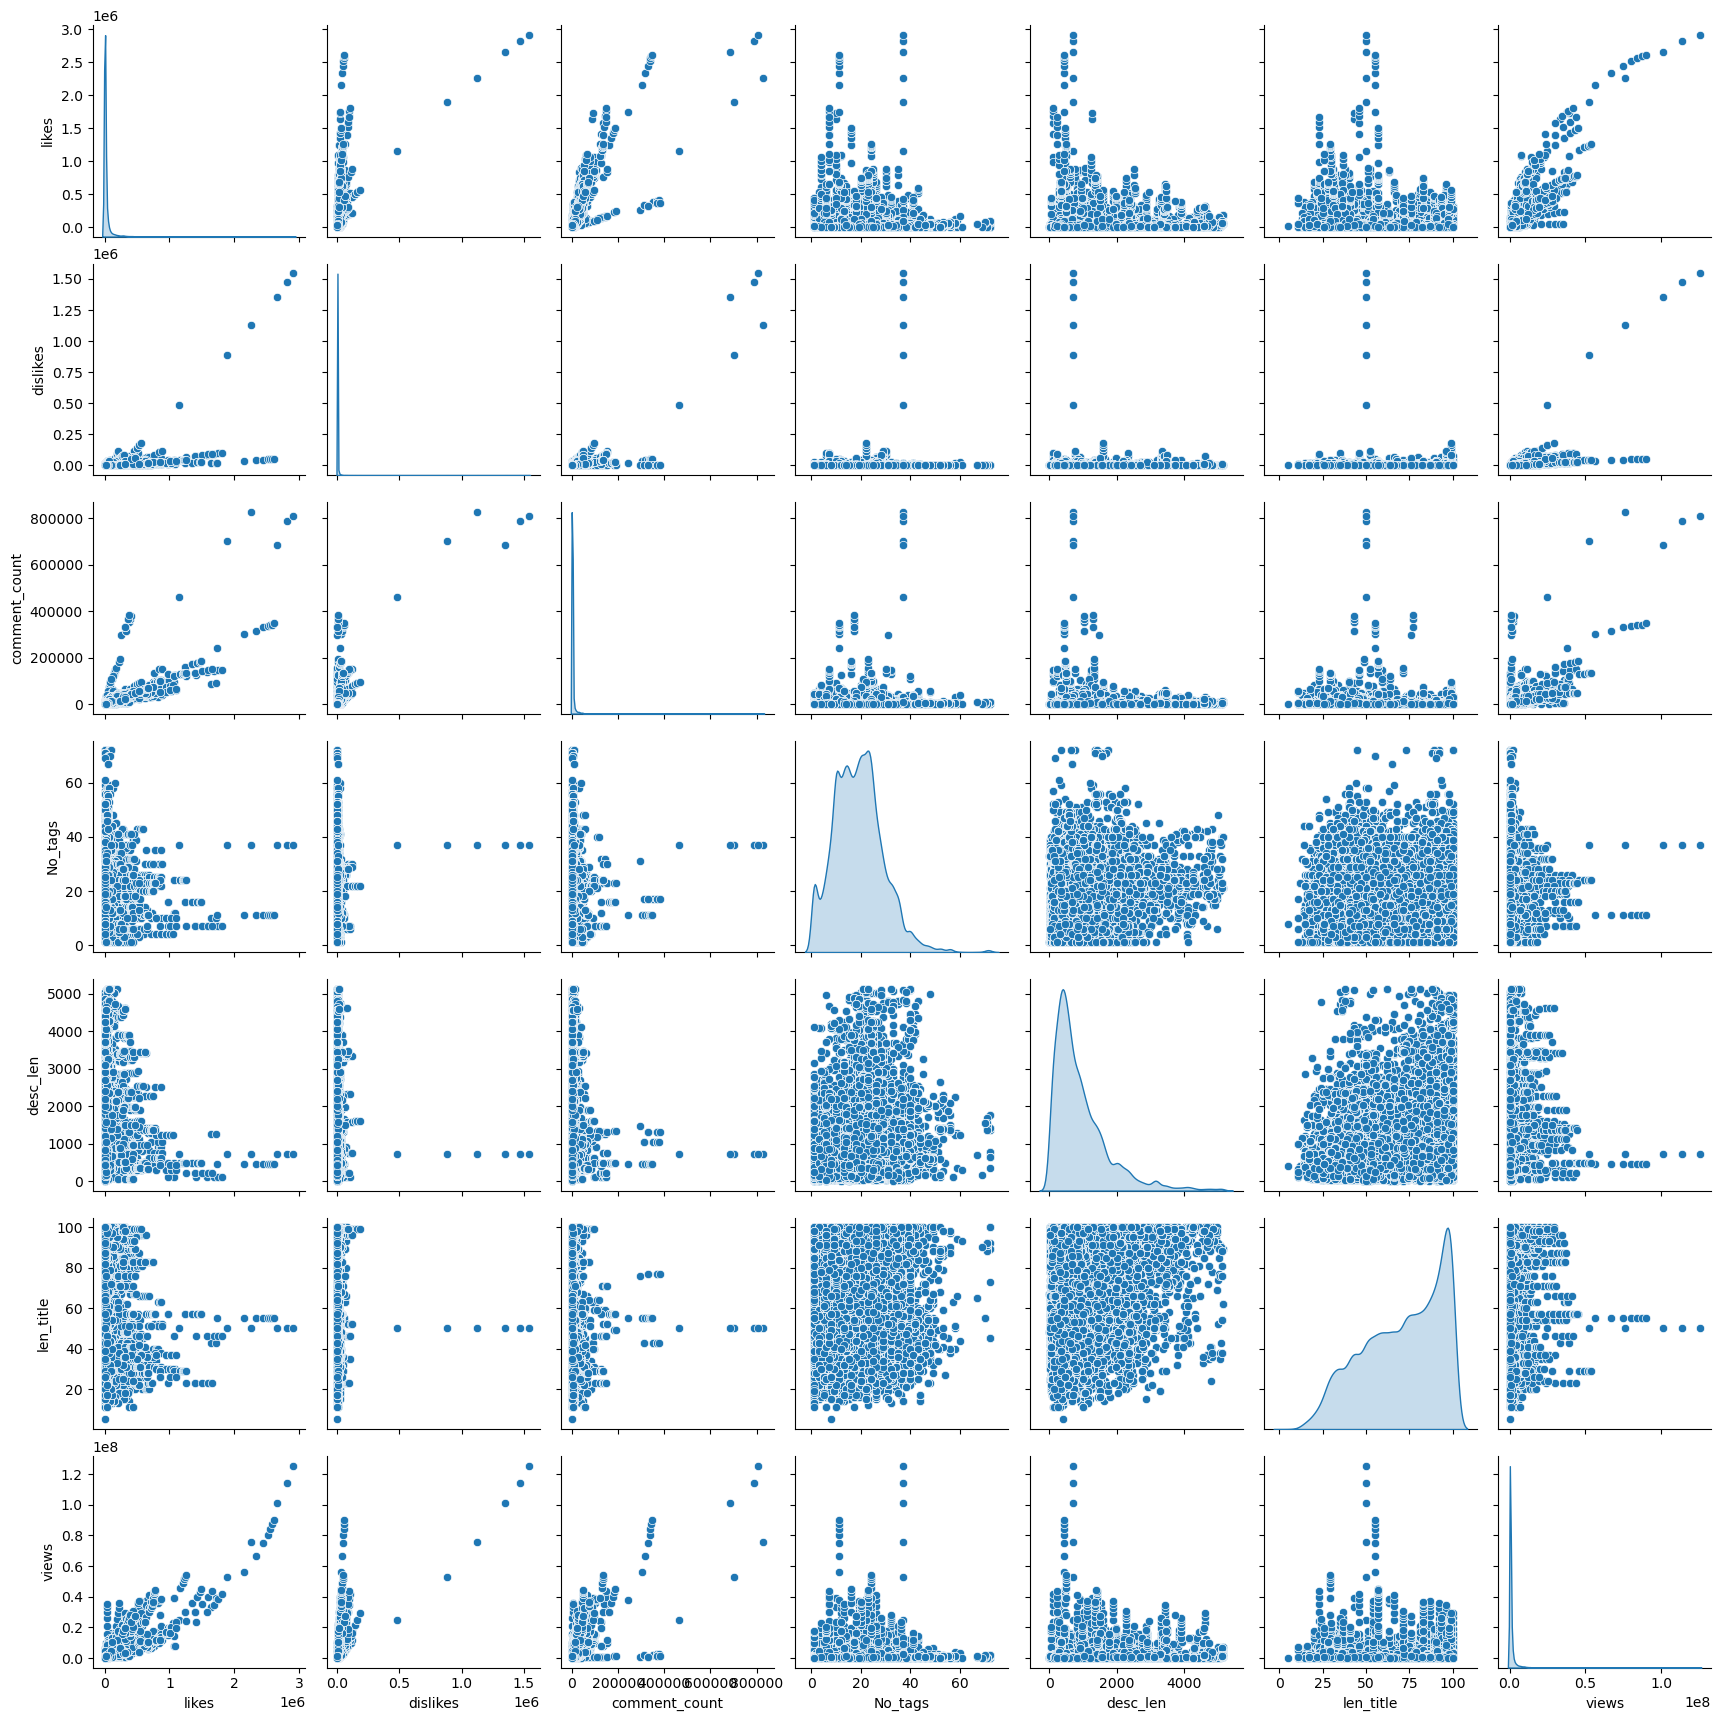

In [14]:
# Generating Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df[nums], diag_kind='kde')


### Insight:
- Terdapat hubungan linier yang antara 'views', 'likes', 'dislikes', dan 'comment_count' artinya semakin tinggi nilai dari salah satu kolom maka semakin tinggi juga nilai pada kolom lainya.
- 


# Data Pre Processing

### Handling Duplicates

In [15]:
# Drop duplicates across all columns
df = df.drop_duplicates()


### Handling Null Values

In [16]:
# Drop rows with null values
df = df.dropna()


### Handling Outliers


### Feature Engineering

##### extract the day of the month (1-31) from both the 'publish_date' and 'trending_date'.

In [17]:
# Ensure 'publish_date' and 'trending_date' are in datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Extract day of the month
df['publish_dd'] = df['publish_date'].dt.day
df['trending_dd'] = df['trending_date'].dt.day

##### Show average views by date

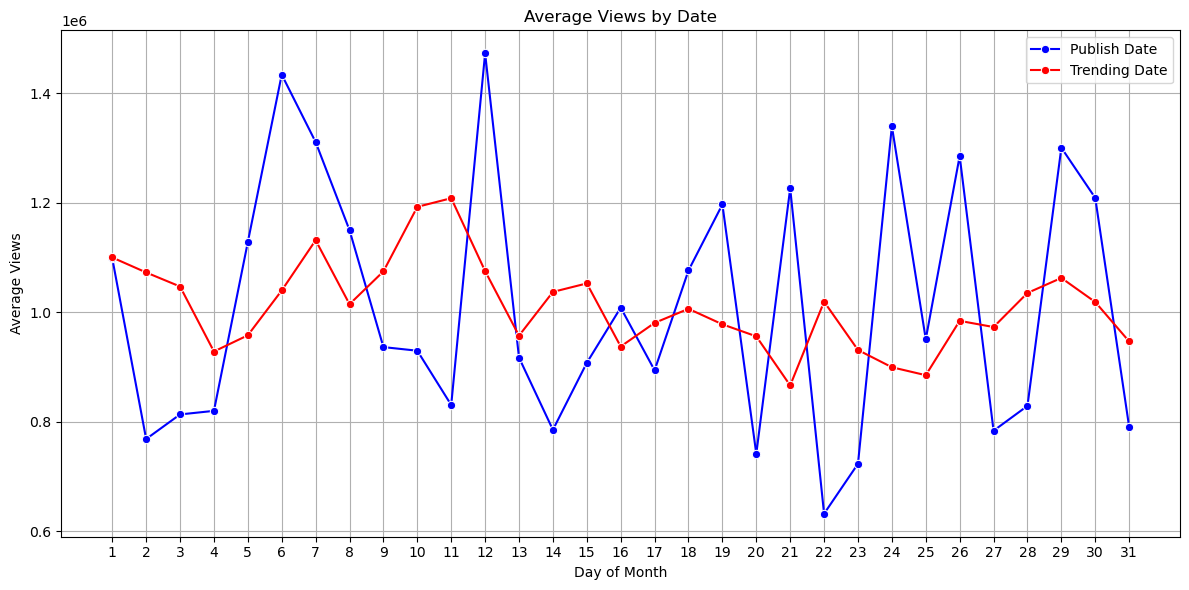

In [18]:
# Group by 'publish_day_month' and calculate average views
average_publish_views = df.groupby('publish_dd')['views'].mean()

# Group by 'trending_day_month' and calculate average views
average_trending_views = df.groupby('trending_dd')['views'].mean()

# Create a figure and set the size
plt.figure(figsize=(12, 6))

# Plotting the average views per day for publish_date
sns.lineplot(x=average_publish_views.index, y=average_publish_views.values, marker='o', color='blue', label='Publish Date')

# Plotting the average views per day for trending_date
sns.lineplot(x=average_trending_views.index, y=average_trending_views.values, marker='o', color='red', label='Trending Date')

# Customize labels and title
plt.title('Average Views by Date')
plt.xlabel('Day of Month')
plt.ylabel('Average Views')
plt.grid(True)
plt.tight_layout()

# Set xticks to show all days from 1 to 31
plt.xticks(range(1, 32))

# Show plot with legend
plt.legend()
plt.show()


##### Create a feature with value of the difference in days between publishing and trending.


In [19]:

# Convert 'trending_date' and 'publish_date' to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Calculate the difference in days between 'publish_date' and 'trending_date'
df['days_to_trend'] = (df['trending_date'] - df['publish_date']).dt.days



In [20]:
# Check Correlation Coefficient of the new feature with target
correlation_coefficient = df['days_to_trend'].corr(df['views'])

print(f"Correlation Coefficient between 'days_to_trend' and 'views': {correlation_coefficient}")

Correlation Coefficient between 'days_to_trend' and 'views': 0.18103002303847188


##### Extract the 'publish_time' to only show the hour, from 0 to 23.

In [21]:

# Function to extract hour from 'publish_time'
def extract_hour(time_str):
    return int(time_str.split(':')[0])

# Apply the function to create a new column with hour values
df['publish_time_bin'] = df['publish_time'].apply(extract_hour)



##### Show distribution of 'views' in 24 hour

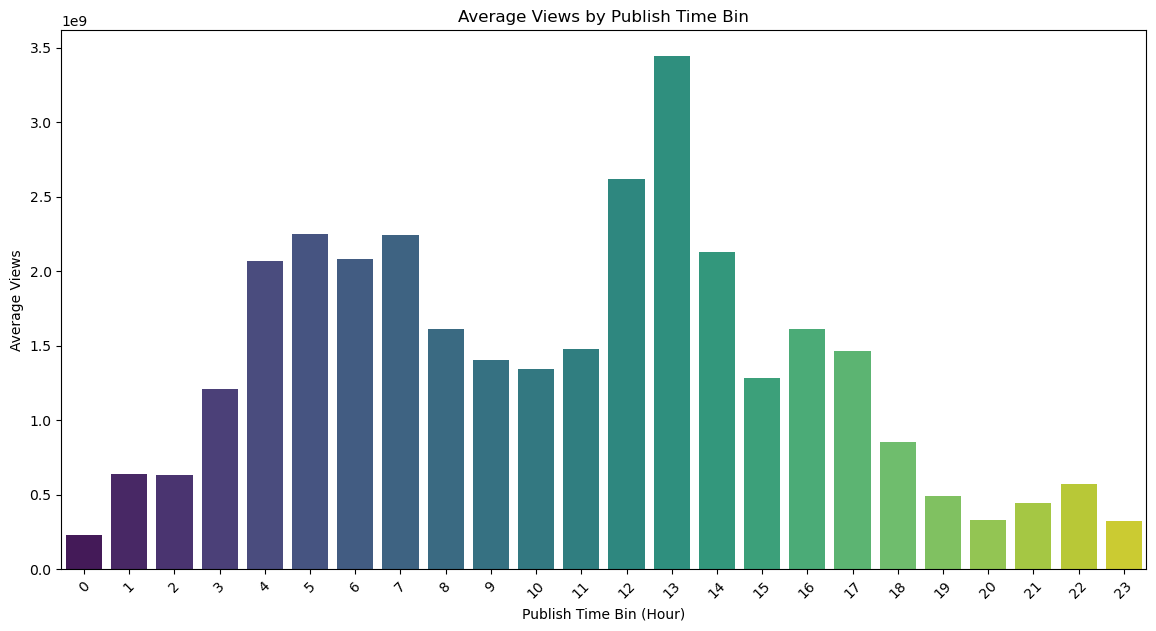

In [22]:

# Group by 'publish_time_bin' and calculate the average views
grouped_publish_time_bin = df.groupby('publish_time_bin')['views'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='publish_time_bin', y='views', data=grouped_publish_time_bin, palette='viridis')
plt.title('Average Views by Publish Time Bin')
plt.xlabel('Publish Time Bin (Hour)')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


##### Extract the trending and publishing dates to obtain the days of the week (1 - 7 = Monday-Sunday)

In [23]:

# Ensure 'trending_date' and 'publish_date' are in datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Extract the day of the week from 'trending_date' and 'publish_date' (Monday-Sunday)
df['trending_day'] = df['trending_date'].dt.strftime('%A')
df['publish_day'] = df['publish_date'].dt.strftime('%A')

# Map days of week to numerical values
day_to_number = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply mapping to 'trending_day' and 'publish_day' columns
df['trending_day'] = df['trending_day'].map(day_to_number)
df['publish_day'] = df['publish_day'].map(day_to_number)


##### Show 'views' distribution across publish day (1 - 7 = Monday-Sunday)

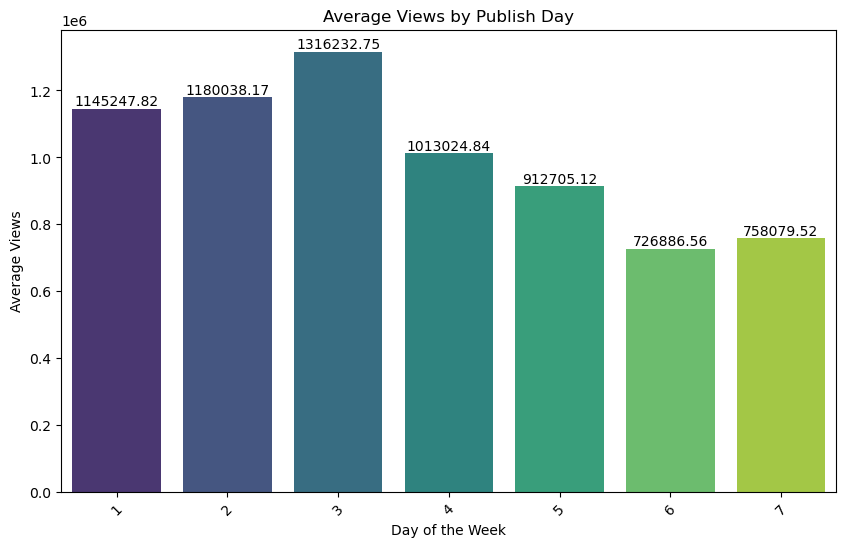

In [24]:

# Group by 'publish_day' and calculate the average views
daywise_views = df.groupby('publish_day')['views'].mean().reset_index()

# Plot the average views by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='publish_day', y='views', data=daywise_views, palette='viridis')

# Annotate the bars with the average views
for i in range(len(daywise_views)):
    plt.text(i, daywise_views['views'][i], round(daywise_views['views'][i], 2), ha='center', va='bottom')

plt.title('Average Views by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  object        
 4   publish_time            32518 non-null  object        
 5   tags                    32518 non-null  object        
 6   views                   32518 non-null  int64         
 7   likes                   32518 non-null  int64         
 8   dislikes                32518 non-null  int64         
 9   comment_count           32518 non-null  int64         
 10  comments_disabled       32518 non-null  object        
 11  ratings_disabled        32518 non-null  object        
 12  video_error_or_removed  32518 non-null  object     

## Feature Selection

Features to drop: 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description', and 'publish_date'

In [26]:
df.drop(columns=['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description', 'publish_date', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'], inplace=True)


Features to model: 

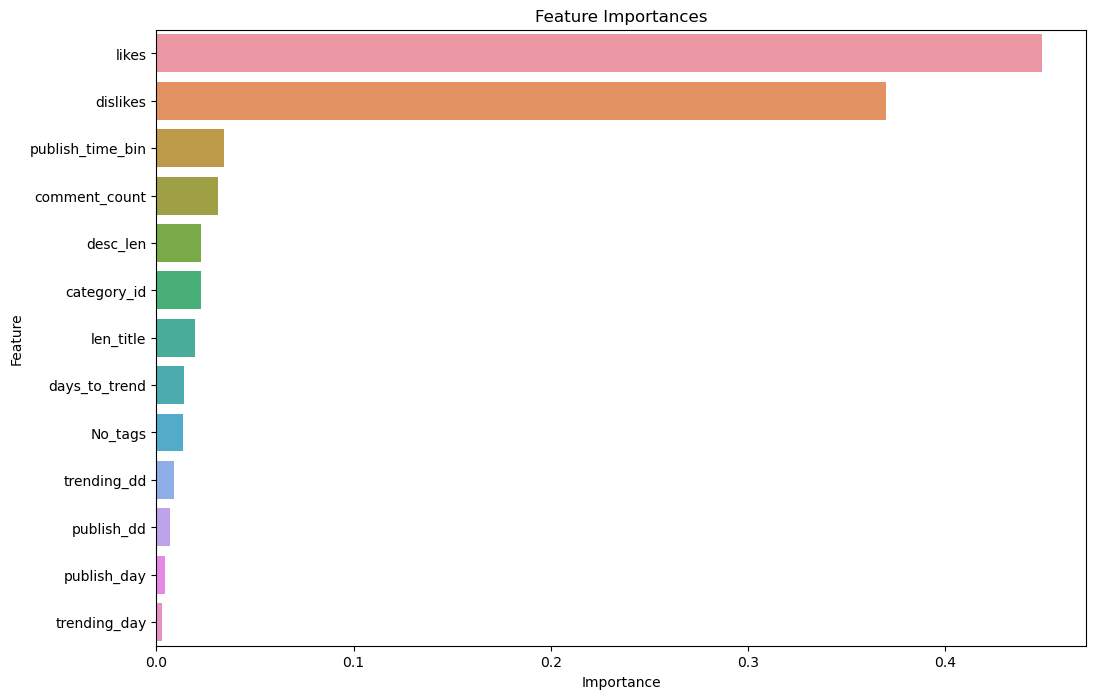

In [28]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X contains all your features and y contains 'views'
X = df.drop('views', axis=1)  # Drop 'views' from predictors
y = df['views']

# Initialize Random Forest model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Berdasarkan score diatas, kami memilih 6 fitur dengan nilai tertinggi untuk menjadi predictor target yaitu 'likes', 'dislikes', 'publish_time_bin', 'comment_count', 'desc_len' dan 'category_id'.

## Feature Encoding

## Feature Transformation

# Modelling

In [31]:
X = df[['likes', 'dislikes', 'publish_time_bin', 'comment_count', 'desc_len', 'category_id']]
y = df[['views']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
# Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])
  # scaler.to_pickle(filename)

In [33]:
# Train linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
## evaluation

In [35]:
print(regressor.intercept_)

[993939.34311572]


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
print('r2 (test): ' + str(r2_score(y_test, y_pred)))

RMSE (test): 1655037.6110341516
MAPE (test): 1.6900490816852864
r2 (test): 0.7184930608735514


In [45]:
regressor.coef_

array([[2664115.88061292,  668714.6047893 ,  -52949.93877071,
        -327075.84090894,  163901.50510281, -196375.59399975]])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
    
  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(regressor)

RMSE (test): 1655037.6110341514
RMSE (train): 1503202.3769049984
r2 (test): 0.7184930608735514
r2 (train): 0.778642622749503
r2 (cross-val test): 0.5004699342424288
r2 (cross-val train): 0.7648368161313484


In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr', 'svd', 'sparse_cg', 'sag', 'saga']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(X_train, y_train)
eval_regression(rs)

RMSE (test): 1655037.7818410862
RMSE (train): 1503202.380676522
r2 (test): 0.7184930027681167
r2 (train): 0.7786426216387351
r2 (cross-val test): 0.5004699342233625
r2 (cross-val train): 0.7648368161313484


In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
eval_regression(dt)

RMSE (test): 1187177.7804074185
RMSE (train): 12389.448031243288
r2 (test): 0.855154539580061
r2 (train): 0.9999849629373395
r2 (cross-val test): 0.6782588149041792
r2 (cross-val train): 0.9999877985717024


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
eval_regression(rf)

RMSE (test): 782922.2711801546
RMSE (train): 283048.3399574223
r2 (test): 0.9370043351331422
r2 (train): 0.9921516146741564
r2 (cross-val test): 0.7944012073904829
r2 (cross-val train): 0.9944429795479536
